## Heart Failure Prediction 📚

Medical Real World Problem Statement :- 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

If you're able to make a machine learning model, then this will help in early detection and people can be saved.

You have to predict a person death event using some features:-
    
   -  Age ,Gender , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time  
   
Dataset link:- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data  


## Loading and Exploring Data 📚

In [34]:
import pandas as pd 
import numpy as np  
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [5]:
data = pd.read_csv(r"C:\Users\hp\Desktop\HFP\heart_failure_clinical_records_dataset.csv") 
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print("Shape of the data", data.shape)

Shape of the data (299, 13)


In [7]:
print("Information about data:- ") 
data.info()

Information about data:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 

In [8]:
print("describing the data:- ") 
data.describe()

describing the data:- 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
print(f"No. of Null Values:-" ) 
data.isnull().sum().sum()

No. of Null Values:-


0

## Exploratory data analysis 📚

Total No. Of Living Cases :-  203
Total No. Of Died Cases :-  96


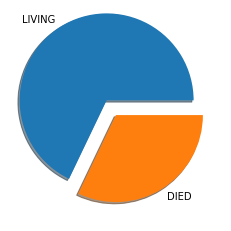

In [10]:
# seeing the distribution of classes, this will help us to identify which types 

len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live , len_death]) 
labels = ['LIVING', 'DIED'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 

# inference :- we are actually working on imbalance data  
# imbalance:- your data is not equally distributed between classes 

C:\Users\hp\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


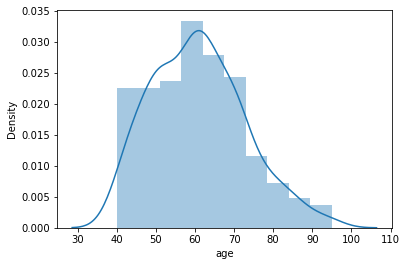

In [11]:
# seeing the distribution of Age  

sns.distplot(data["age"]) 
plt.show() 

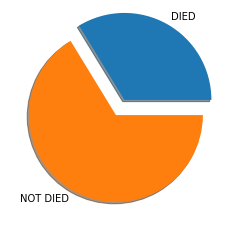

Total no. of died cases,  85
Total no. of not died cases,  167


In [12]:
# selecting rows that are above age 50 and seeing died or not 
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]  

len_died = len(age_above_50_died) 
len_not_died = len(age_above_50_not_died) 

arr1 = [len_died, len_not_died] 
labels = ['DIED', 'NOT DIED'] 

plt.pie(arr1, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

print ("Total no. of died cases, ", len_died) 
print("Total no. of not died cases, ", len_not_died)
# inference in most of the cases people aged above 50 not died but accordinly if you compare with above 
# plot you will be seeing that died ration is comparitively higher here 

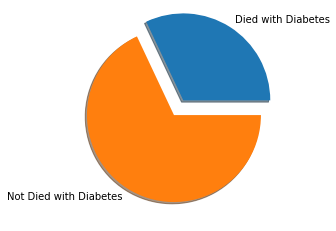

In [13]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0] 
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1) 
len_d_alive = len(patient_nhave_diabetes_0) 

arr2 = [len_d_died,len_d_alive] 
labels = ['Died with Diabetes', "Not Died with Diabetes"] 
plt.pie(arr2, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

# inference:- here you can see the that the most of the person are alive who have diabetes

" \n - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. \n - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  \n - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  \n - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   \n - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.\n"

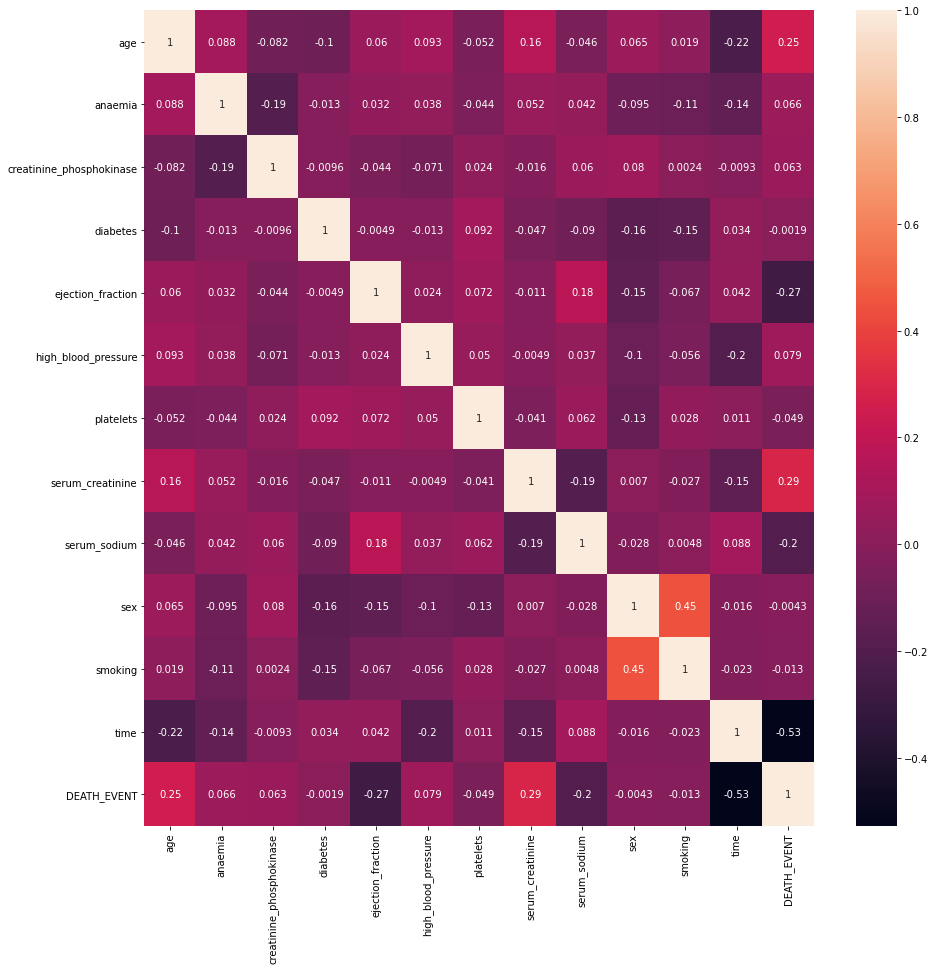

In [14]:
# checking the Correlation of our variables  

corr = data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

# interpretation of correlation matrix 

''' 
 - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
 - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  
 - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  
 - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   
 - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
''' 

# references:- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [15]:
# you can do the same as here 
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Dataset development📚

In [17]:
from sklearn.model_selection import train_test_split 

X = data.drop('DEATH_EVENT', axis=1) 
y = data["DEATH_EVENT"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
print("Shape of the X_train", X_train.shape) 
print("Shape of the y_train", y_train.shape) 
print("Shape of the X_test", X_test.shape) 
print("Shape of the y_test", y_test.shape) 

Shape of the X_train (209, 12)
Shape of the y_train (209,)
Shape of the X_test (90, 12)
Shape of the y_test (90,)


In [18]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.05640325 0.02474219 0.0551071  0.01885537 0.13321206 0.01888946
 0.05161393 0.09905108 0.06002232 0.02109362 0.02543205 0.43557758]


## Feature Engineering 📚

Now, we will do feature engineering, we will add interaction terms, interaction terms are the product of two features, so below 
is the function prepared for interaction terms. 

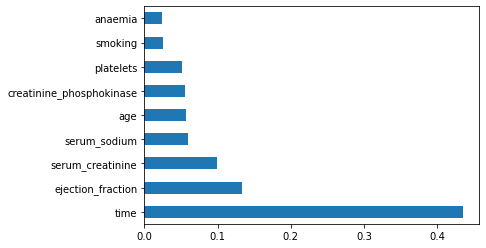

In [19]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()


In [20]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)

    for i in range(m):
        
        feature_i_name = features[i]
        
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] =  feature_i_data * feature_j_data
        
    return X_int 


x_train_mod = add_interactions(X_train) 
x_test_mod  = add_interactions(X_test) 

## Model Building 📚

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

In [22]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000) 
lr_clf.fit(X_train, y_train) 

lr_clf_pred = lr_clf.predict(X_test) 

In [23]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred)

Accuracy Score:-  0.7888888888888889
Precision Score:-  0.7647058823529411
Recall Score:-  0.4642857142857143
Confusion Matrix:- 
 [[58  4]
 [15 13]]


In [24]:
# building logistic regression with StandardScaler  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(X_train, y_train) 

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.7894736842105263
Recall Score:-  0.5357142857142857
Confusion Matrix:- 
 [[58  4]
 [13 15]]


In [25]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [27]:
svc = SVC(C = 10, gamma = 0.0001) 
svc.fit(X_train, y_train) 
y_pred2 = svc.predict(X_test) 
evaluating_model(y_test, y_pred2)

Accuracy Score:-  0.6777777777777778
Precision Score:-  0.4
Recall Score:-  0.07142857142857142
Confusion Matrix:- 
 [[59  3]
 [26  2]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.847
Test score: 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [29]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.72
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[55  7]
 [10 18]]


In [30]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))


Training score: 0.847
Test score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [31]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)

Accuracy Score:-  0.8666666666666667
Precision Score:-  0.9
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[60  2]
 [10 18]]


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(X_train, y_train) 

pred_gdbt = gbdt.predict(X_test) 
evaluating_model(y_test, pred_gdbt)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8571428571428571
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[59  3]
 [10 18]]


### Choosing the best model and saving them 

In [35]:
filename = 'model.pkl' 
pickle.dump(gbdt, open(filename, 'wb'))